In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
trainDataset = pd.read_csv("drugsComTrain_raw.tsv", sep = '\t')
testDataset = pd.read_csv("drugsComTest_raw.tsv", sep = '\t')

print('trainDataset size' , trainDataset.shape)
print('testDataset size' , testDataset.shape)

trainDataset size (161297, 7)
testDataset size (53766, 7)


In [3]:
data = pd.concat([trainDataset, testDataset])
print('Final concatenated Dataset ', data.shape)
data.head()


Final concatenated Dataset  (215063, 7)


,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [4]:
# !pip install transformers

In [5]:
# from transformers import pipeline

# sent_pipeline = pipeline("sentiment-analysis")

In [6]:
data.columns = ['Id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount']
data.head()

,Id,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [7]:
data.isnull().sum()
data.dropna(inplace=True)
data.isnull().sum()
data.shape

(213869, 7)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213869 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Id           213869 non-null  int64  
 1   drugName     213869 non-null  object 
 2   condition    213869 non-null  object 
 3   review       213869 non-null  object 
 4   rating       213869 non-null  float64
 5   date         213869 non-null  object 
 6   usefulCount  213869 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 13.1+ MB


In [9]:
data['Id'].nunique()

213869

In [10]:
data['review'][1]

1    "My son is halfway through his fourth week of ...
1    "My son has Crohn&#039;s disease and has done ...
Name: review, dtype: object

In [11]:
data['rating'].value_counts()

rating
10.0    67682
9.0     36499
1.0     28769
8.0     24909
7.0     12470
5.0     10650
2.0      9203
3.0      8662
6.0      8403
4.0      6622
Name: count, dtype: int64

# Review Counts based on ratings

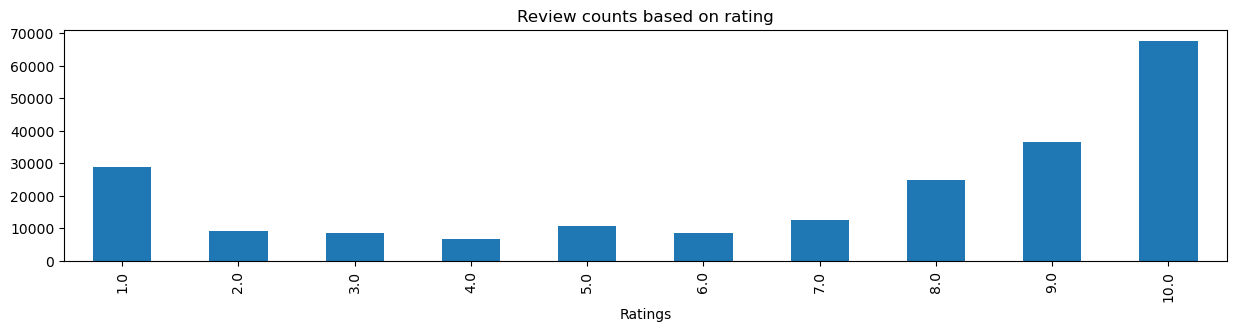

In [12]:
ax = data['rating'].value_counts().sort_index() \
    .plot(
        kind='bar', 
        title="Review counts based on rating",
        figsize=((15, 3))
    )
ax.set_xlabel('Ratings')
plt.show()

In [13]:
totalSentimentCounts = {}

totalSentimentCounts['Negative'] = len(data[data['rating'] < 4])
totalSentimentCounts['Neutral'] = len(data[(data['rating'] >= 5) & (data['rating'] < 7) ])
totalSentimentCounts['Positive'] = len(data[data['rating'] >= 7.0])

print(totalSentimentCounts['Positive'], totalSentimentCounts['Negative'], totalSentimentCounts['Neutral'])

141560 46634 19053


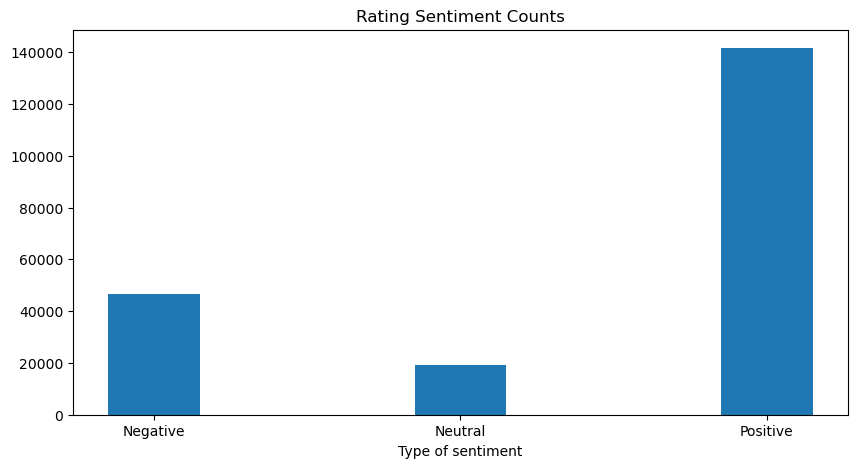

In [14]:
labels = list(totalSentimentCounts.keys())
values = list(totalSentimentCounts.values())
 
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(labels, values, width = 0.3)
plt.title("Rating Sentiment Counts")
plt.xlabel("Type of sentiment")
plt.show()

In [15]:
data.loc[data['rating'] >= 7.0,"ratingSentimentLabel"] ="positive"
data.loc[(data['rating'] >= 4.0) & (data['rating']<7.0),"ratingSentimentLabel"]= "neutral"
data.loc[data['rating']<= 3.0,"ratingSentimentLabel"] = "negative"

data.head()

,Id,drugName,condition,review,rating,date,usefulCount,ratingSentimentLabel
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,positive
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,positive
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,neutral
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,positive
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,positive


In [16]:
import nltk
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
# Stop words using normal looping + TO DO: REMOVE THIS LATER

# for row in data['review']:
#     for item in row.split():
#         if(item not in stopwords):
#             print(item)
#             break

# Removing stopwords from review columns
data['cleanReview'] = data['review'].apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords]))

In [18]:
data['cleanReview'][0]

0    "It side effect, I take combination Bystolic 5...
0    "I&#039;ve tried antidepressants years (citalo...
Name: cleanReview, dtype: object

In [19]:
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

# Apply to the DF series
data['cleanReview'] = data['cleanReview'].apply(remove_punctuations)


In [20]:
# Clean Reviews after removing punctuations
data['cleanReview'].head(10)

0    It side effect I take combination Bystolic 5 M...
1    My son halfway fourth week Intuniv We became c...
2    I used take another oral contraceptive 21 pill...
3    This first time using form birth control I039m...
4    Suboxone completely turned life around I feel ...
5    2nd day 5mg started work rock hard erections h...
6    He pulled out cummed bit me I took Plan B 26 h...
7    Abilify changed life There hope I Zoloft Cloni...
8     I Ve nothing problems Keppera  constant shaki...
9    I pill many years When doctor changed RX chate...
Name: cleanReview, dtype: object

# NLTK - VADER Sentiment Scoring - Uses Bag of Words (BOW)

In [29]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

data = data.head(50000)

In [30]:
data['vaderReviewScore'] = data['cleanReview'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [31]:
data.head()

,Id,drugName,condition,review,rating,date,usefulCount,ratingSentimentLabel,cleanReview,vaderReviewScore,vaderSentiment,vaderSentimentLabel
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,positive,It side effect I take combination Bystolic 5 M...,0.0000,0,neutral
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,positive,My son halfway fourth week Intuniv We became c...,0.9068,2,positive
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,neutral,I used take another oral contraceptive 21 pill...,0.7096,2,positive
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,positive,This first time using form birth control I039m...,0.7184,2,positive
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,positive,Suboxone completely turned life around I feel ...,0.9403,2,positive


In [32]:
totalVaderSentimentCounts = {}

totalVaderSentimentCounts['Positive'] = len(data[data['vaderReviewScore'] >= 0.05])
totalVaderSentimentCounts['Negative'] = len(data[(data['vaderReviewScore'] > -0.05) & (data['vaderReviewScore'] < 0.05) ])
totalVaderSentimentCounts['Neutral'] = len(data[data['vaderReviewScore'] <-0.05])

print(totalVaderSentimentCounts['Positive'], totalVaderSentimentCounts['Negative'], totalVaderSentimentCounts['Neutral'])

24095 2422 23480


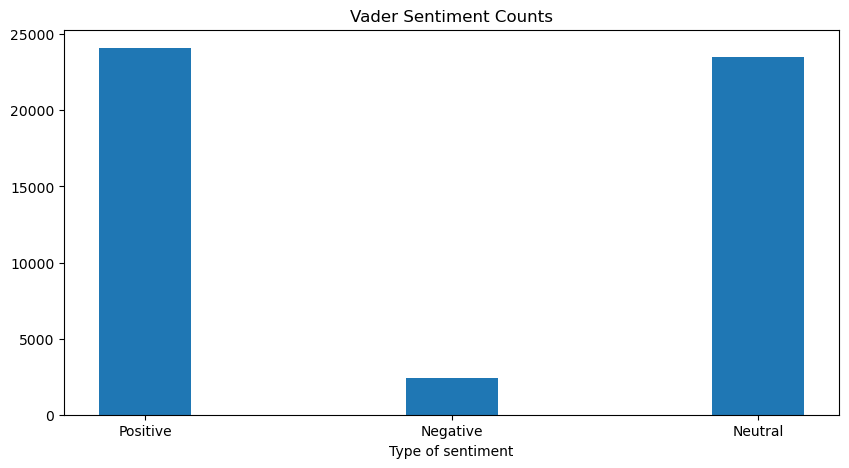

In [33]:
labels = list(totalVaderSentimentCounts.keys())
values = list(totalVaderSentimentCounts.values())
 
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(labels, values, width = 0.3)
plt.title("Vader Sentiment Counts")
plt.xlabel("Type of sentiment")
plt.show()

In [34]:
data['vaderSentiment'] = data['vaderReviewScore'].map(lambda x: int(2) if x >=0.05  else int(1) if x<=-0.05 else int(0))

In [35]:
Total_vaderSentiment = totalSentimentCounts['Positive'] + totalSentimentCounts['Negative'] + totalSentimentCounts['Neutral']
Total_vaderSentiment

207247

In [36]:
data.loc[data['vaderReviewScore'] >=0.05,"vaderSentimentLabel"] = "positive"
data.loc[(data['vaderReviewScore'] >-0.05) & (data['vaderReviewScore']<0.05),"vaderSentimentLabel"]= "neutral"
data.loc[data['vaderReviewScore']<=-0.05,"vaderSentimentLabel"] = "negative"

data.head()

,Id,drugName,condition,review,rating,date,usefulCount,ratingSentimentLabel,cleanReview,vaderReviewScore,vaderSentiment,vaderSentimentLabel
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,positive,It side effect I take combination Bystolic 5 M...,0.0000,0,neutral
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,positive,My son halfway fourth week Intuniv We became c...,0.9068,2,positive
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,neutral,I used take another oral contraceptive 21 pill...,0.7096,2,positive
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,positive,This first time using form birth control I039m...,0.7184,2,positive
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,positive,Suboxone completely turned life around I feel ...,0.9403,2,positive


In [37]:
data.loc[data['rating'] >= 7.0,"ratingSentimentLabel"] = "positive"
data.loc[(data['rating'] >= 5.0) & (data['rating'] <= 7),"ratingSentimentLabel"] = "neutral"
data.loc[data['rating'] <= 3.0,"ratingSentimentLabel"] = "negative"
data.head()

,Id,drugName,condition,review,rating,date,usefulCount,ratingSentimentLabel,cleanReview,vaderReviewScore,vaderSentiment,vaderSentimentLabel
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,positive,It side effect I take combination Bystolic 5 M...,0.0000,0,neutral
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,positive,My son halfway fourth week Intuniv We became c...,0.9068,2,positive
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,neutral,I used take another oral contraceptive 21 pill...,0.7096,2,positive
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,positive,This first time using form birth control I039m...,0.7184,2,positive
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,positive,Suboxone completely turned life around I feel ...,0.9403,2,positive


In [38]:
data.to_csv('reviews_processed.csv')

In [39]:
import os
os.stat('reviews_processed.csv').st_size         # Check size of csv file About 181MB

43424942

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 0 to 50303
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    50000 non-null  int64  
 1   drugName              50000 non-null  object 
 2   condition             50000 non-null  object 
 3   review                50000 non-null  object 
 4   rating                50000 non-null  float64
 5   date                  50000 non-null  object 
 6   usefulCount           50000 non-null  int64  
 7   ratingSentimentLabel  50000 non-null  object 
 8   cleanReview           50000 non-null  object 
 9   vaderReviewScore      50000 non-null  float64
 10  vaderSentiment        50000 non-null  int64  
 11  vaderSentimentLabel   50000 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 5.0+ MB


In [41]:
data.to_csv('reviews_processed.csv.gz',compression='gzip')

In [42]:
os.stat('reviews_processed.csv.gz').st_size    #compressed to about 54MB 

14270176

In [43]:
data.groupby('vaderSentimentLabel').size()

vaderSentimentLabel
negative    23483
neutral      2422
positive    24095
dtype: int64

In [44]:
data.columns
data2 = data[['Id', 'cleanReview', 'rating', 'ratingSentimentLabel', 'vaderReviewScore', 'vaderSentimentLabel', 'vaderSentiment']].copy()    # creating a new dataframe with just review and rating for sentiment analysis
data2

,Id,cleanReview,rating,ratingSentimentLabel,vaderReviewScore,vaderSentimentLabel,vaderSentiment
0,206461,It side effect I take combination Bystolic 5 M...,9.0,positive,0.0000,neutral,0
1,95260,My son halfway fourth week Intuniv We became c...,8.0,positive,0.9068,positive,2
2,92703,I used take another oral contraceptive 21 pill...,5.0,neutral,0.7096,positive,2
3,138000,This first time using form birth control I039m...,8.0,positive,0.7184,positive,2
4,35696,Suboxone completely turned life around I feel ...,9.0,positive,0.9403,positive,2
...,...,...,...,...,...,...,...
50298,15364,I woke one morning pill two days I covered pim...,3.0,negative,0.6022,positive,2
50299,14358,I Vicodin 2 years At worst I taking 1525 day I...,6.0,neutral,-0.7430,negative,1
50301,51903,Stelara effective 3 years lengthen time inject...,8.0,positive,-0.1531,negative,1
50302,124928,pretty good,10.0,positive,0.7269,positive,2


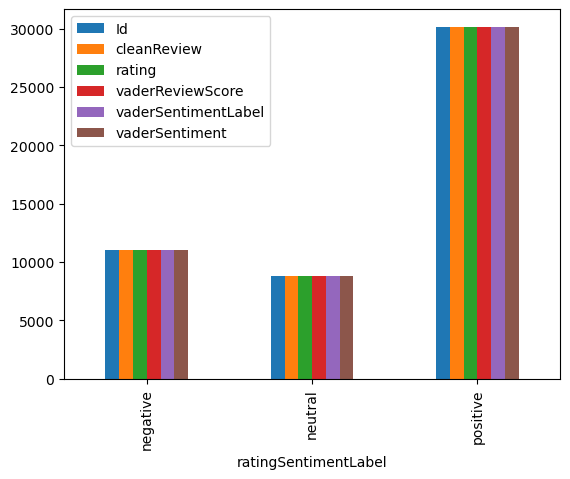

In [45]:
data2.groupby('ratingSentimentLabel').size()
data2.groupby('ratingSentimentLabel').count().plot.bar()
plt.show()

In [46]:
data2['ratingSentiment']= data2['rating'].map(lambda x:int(2) if x>=7 else int(1) if x<=3 else int(0) )
data2.head()

,Id,cleanReview,rating,ratingSentimentLabel,vaderReviewScore,vaderSentimentLabel,vaderSentiment,ratingSentiment
0,206461,It side effect I take combination Bystolic 5 M...,9.0,positive,0.0000,neutral,0,2
1,95260,My son halfway fourth week Intuniv We became c...,8.0,positive,0.9068,positive,2,2
2,92703,I used take another oral contraceptive 21 pill...,5.0,neutral,0.7096,positive,2,0
3,138000,This first time using form birth control I039m...,8.0,positive,0.7184,positive,2,2
4,35696,Suboxone completely turned life around I feel ...,9.0,positive,0.9403,positive,2,2


In [47]:
data2.groupby('ratingSentiment').size()

ratingSentiment
0     5886
1    11051
2    33063
dtype: int64

In [48]:
positive_vader_sentiments = data2[data2.ratingSentiment == 2]
positive_string = []
for s in positive_vader_sentiments.cleanReview:
  positive_string.append(s)
positive_string = pd.Series(positive_string).str.cat(sep=' ')

In [49]:
!pip install wordcloud

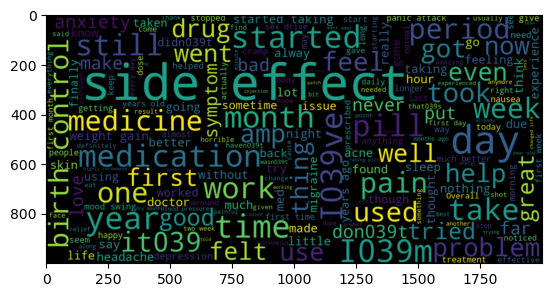

In [50]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=2000,height=1000,max_font_size=200).generate(positive_string)
plt.imshow(wordcloud,interpolation='bilinear')
plt.show()

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english',ngram_range=(1,2))
features = tfidf.fit_transform(data2.cleanReview)
labels   = data2.vaderSentiment
data2.head()

<50000x801017 sparse matrix of type '<class 'numpy.float64'>'
	with 3378191 stored elements in Compressed Sparse Row format>

In [79]:
print(features)

  (0, 233212)	0.13856026239665867
  (0, 145360)	0.20960204919009048
  (0, 118773)	0.2807289610611253
  (0, 448005)	0.13538493180729927
  (0, 276839)	0.292634595043931
  (0, 495506)	0.24332848910406535
  (0, 233403)	0.3749103683061255
  (0, 145408)	0.39366718155981856
  (0, 118807)	0.3749103683061255
  (0, 448419)	0.39366718155981856
  (0, 276856)	0.3222160413346823
  (1, 639919)	0.06756306045978569
  (1, 315230)	0.09700255600902317
  (1, 285833)	0.08374102134033311
  (1, 763931)	0.07434994694177353
  (1, 373685)	0.09950472628750383
  (1, 151933)	0.0764249610125299
  (1, 90964)	0.057281934373595
  (1, 650079)	0.03202860998817738
  (1, 684949)	0.03006162549526832
  (1, 333950)	0.08981433864874107
  (1, 215659)	0.04471914461070464
  (1, 182182)	0.09960875161972323
  (1, 319688)	0.0723122672037332
  (1, 89705)	0.055139405193935544
  :	:
  (49997, 595211)	0.25139394938286924
  (49998, 303759)	0.3803302957339921
  (49998, 546936)	0.504703106110637
  (49998, 547156)	0.774999123115097
  (49999

In [76]:
features.shape

(50000, 801017)

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [81]:
x_train,x_test,y_train,y_test = train_test_split(data2['cleanReview'],data2['ratingSentimentLabel'],random_state=0)

In [83]:
print(x_train.shape, x_test.shape)

40003    Caused restless leg syndrome unable fall aslee...
18572    I Portia 2 years It effective reducing cramps ...
33441    I Duragesic since Aug 2001 went bedridden 5 7 ...
35217    Started taking extreme tiredness week ago exha...
31174    I severe stomach ulcers pain unbearable I some...
                               ...                        
21373    My daughter Turners She since 2  4 now It work...
46171    Temazepam helps fall asleep doesn039t help sta...
42866    The day I got skyla horrible doctor asked I ta...
43831    I039m 33 years old I039ve medication 6 years M...
2746     have Valtrex year suppressive therapy works li...
Name: cleanReview, Length: 37500, dtype: object 11908    Inderal miracle medicine me It prevented migra...
19722    I want kids tried various birth control w horr...
45795    I haven039t use medicine years When I years ag...
25903    I took 10 mg lisinopril month could handle sid...
42895    This drug helpful I used pus filled acne face ...
        

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [57]:
models = [
  RandomForestClassifier(n_estimators=200,max_depth=3,random_state=0),
  LinearSVC(),
  MultinomialNB(),
  LogisticRegression(random_state=0,solver='lbfgs',max_iter=2000,multi_class='auto')
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model,features,labels,scoring='accuracy',cv=CV)
  for fold_idx,accuracy in enumerate(accuracies):
    entries.append((model_name,fold_idx,accuracy))
cv_df = pd.DataFrame(entries,columns=['model_name','fold_idx','accuracy'])

/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_cla

In [58]:
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.5339
1,RandomForestClassifier,1,0.5370
2,RandomForestClassifier,2,0.5486
3,RandomForestClassifier,3,0.5432
4,RandomForestClassifier,4,0.5363
5,LinearSVC,0,0.8543
6,LinearSVC,1,0.8536
7,LinearSVC,2,0.8590
8,LinearSVC,3,0.8631
9,LinearSVC,4,0.8503


In [59]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.85606
LogisticRegression        0.83780
MultinomialNB             0.76014
RandomForestClassifier    0.53980
Name: accuracy, dtype: float64

In [69]:
from lightgbm import LGBMModel,LGBMClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# clf = LGBMClassifier(
#         n_estimators=10000,
#         learning_rate=0.10,
#         num_leaves=30,
#         subsample=.9,
#         max_depth=7,
#         reg_alpha=.1,
#         reg_lambda=.1,
#         min_split_gain=.01,
#         min_child_weight=2,
#         silent=-1,
#         verbose=-1,
# )

# model = clf.fit(x_train, y_train)

# Predictions
# predictions = clf.predict(x_test)
# print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions))
# print ("The confusion Matrix is ")
# confusion_matrix(y_test, predictions)

LogisticRegression()


In [83]:
# from tqdm.notebook import tqdm

# res = {}

# for index, row in tqdm(data.iterrows(), total=len(data)):
#     res[index] = sia.polarity_scores(row['review'])

In [84]:
# vaderResults = pd.DataFrame(res)

# vaderResults = vaderResults.T

# vaderResults = vaderResults.reset_index().rename(columns={
#     'index' : 'Id'
# })

# # Final Dataset with vader polarity scores
# data = data.merge(vaderResults, how='left')

# data.head()


In [85]:
# from tqdm.notebook import tqdm

# for i, row in tqdm(data.iterrows(), total=len(data)):
#     reviewText = row['review']
#     vader_sentiments = sia.polarity_scores(reviewText)
    
#     # Vader sentiment polarity
#     data['vader_neg'] = vader_sentiments['neg']
#     data['vader_neu'] = vader_sentiments['neu']
#     data['vader_pos'] = vader_sentiments['pos']
#     data['vader_compound'] = vader_sentiments['compound']

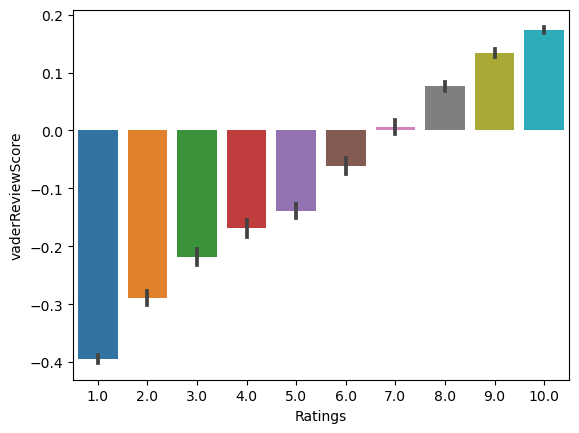

In [265]:
import seaborn as sns

ax = sns.barplot(data=data2, x = 'rating', y = 'vaderReviewScore')
ax.set_xlabel('Ratings')
plt.show()

In [173]:
# fig, axs = plt.subplots(1,3, figsize=(15,3))
# sns.barplot(data=data, x = 'rating', y = 'pos', ax=axs[0])
# sns.barplot(data=data, x = 'rating', y = 'neu', ax=axs[1])
# sns.barplot(data=data, x = 'rating', y = 'neg', ax=axs[2])
# axs[0].set_title('Positive')
# axs[1].set_title('Neutral')
# axs[2].set_title('Negative')
# plt.show()

In [174]:
# Text Tokenization and Cleaning
# import re
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# stop_words = set(stopwords.words('english'))

# def clean_text(text):
#     text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
#     text = text.lower()  # convert to lowercase
#     tokens = word_tokenize(text)  # tokenize text
#     filtered_tokens = [word for word in tokens if word not in stop_words]  # remove stopwords
#     return ' '.join(filtered_tokens)

# data['clean_review'] = data['review'].apply(clean_text)

# Feature Engineering
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(data['clean_review'])
y = data['sentiment']

KeyError: 'clean_review'

In [ ]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Sentiment Classifier
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

# Evaluation
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classificati_report(y_test, y_onpred))

Accuracy: 0.825759454432734
Classification Report:


NameError: name 'classificati_report' is not defined

In [ ]:
# Sentiment Analysis
data['predicted_sentiment'] = classifier.predict(tfidf_vectorizer.transform(data['clean_review']))

# Displaying the results
print(data[['review', 'rating', 'sentiment', 'predicted_sentiment']].head(10))

                                              review  rating sentiment  \
0  "It has no side effect, I take it in combinati...     9.0  positive   
1  "My son is halfway through his fourth week of ...     8.0  positive   
2  "I used to take another oral contraceptive, wh...     5.0   neutral   
3  "This is my first time using any form of birth...     8.0  positive   
4  "Suboxone has completely turned my life around...     9.0  positive   
5  "2nd day on 5mg started to work with rock hard...     2.0  negative   
6  "He pulled out, but he cummed a bit in me. I t...     1.0  negative   
7  "Abilify changed my life. There is hope. I was...    10.0  positive   
8  " I Ve had  nothing but problems with the Kepp...     1.0  negative   
9  "I had been on the pill for many years. When m...     8.0  positive   

  predicted_sentiment  
0            positive  
1            positive  
2            positive  
3            positive  
4            positive  
5            positive  
6            nega